# CNN(Convolutional Neural Network)

In [2]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

1.15.0


(1, 3, 3, 1)


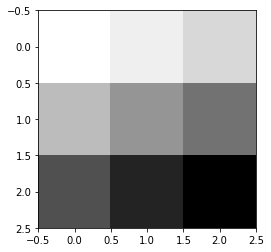

In [3]:
sess = tf.InteractiveSession()
img = np.array([[[[1], [2], [3]],
                 [[4], [5], [6]],
                 [[7], [8], [9]]]], dtype=np.float32)
print(img.shape)
plt.imshow(img.reshape(3, 3), cmap='Greys')

img.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


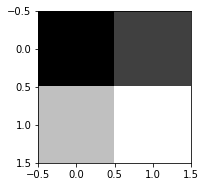

In [4]:
print("img.shape", img.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                        [[[1.]], [[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(img, weight, strides=[1,1,1,1], padding="VALID")          # convolutional layer 만들기 
conv2d_img = conv2d.eval()
print("conv2d_img", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

### Padding option 다르게 주기

img.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


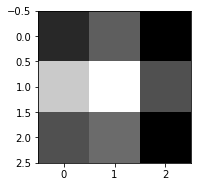

In [5]:
print("img.shape", img.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                        [[[1.]], [[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(img, weight, strides=[1,1,1,1], padding="SAME")          # padding='SAME'은 img와 크기 동일하게 하기
conv2d_img = conv2d.eval()
print("conv2d_img", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

### 3filters

img.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


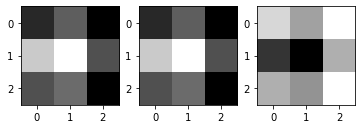

In [6]:
print("img.shape", img.shape)
weight = tf.constant([[[[1., 10., -1.]], [[1., 10., -1.]]],
                        [[[1., 10., -1.]], [[1., 10., -1.]]]])                      # 필터 개수 3개
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(img, weight, strides=[1,1,1,1], padding="SAME")
conv2d_img = conv2d.eval()
print("conv2d_img", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 3, i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## Max Pooling

#### 각 창에서 최대 값만 추출

In [7]:
img2 = np.array([[[[4], [3]],
                [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(img2, ksize=[1, 2, 2, 1],
                        strides=[1, 1, 1, 1], padding='SAME')               # CNN에선 MAX POOLING 자주 사용
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## MNIST에 적용하기

In [10]:
## 데이터 읽기

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


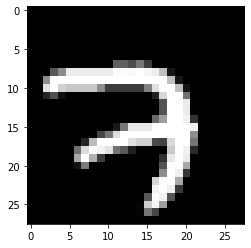

In [11]:
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap='gray')

## MNIST Convolution layer 

Tensor("Conv2D_9:0", shape=(1, 14, 14, 5), dtype=float32)


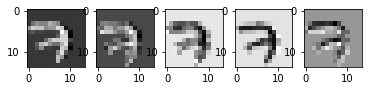

In [22]:
sess = tf.InteractiveSession()

img = img.reshape(-1, 28, 28, 1)                                        # 28x28에 한 가지 색상 -1: 계산은 알아서
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')        # strides 2칸씩 띄기
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14, 14), cmap='gray')

## MNIST Max Pooling

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


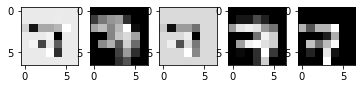

In [23]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

## MNIST Training!

## Conv layer 1

In [32]:
tf.reset_default_graph()                                                                            # 그래프 초기화

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))                  # 32개의 필터 / 크기는 3 x 3 / 채널은 1 가지
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')   # pooling이 지나가면 stride가 2 x 2이므로 결과는 14 x 14

## Conv layer 2

In [33]:
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))                  # 64개의 필터 / 크기는 3 x 3 / 채널은 32 가지 (항상 input의 채널과 동일)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.reshape(L2, [-1, 7 * 7 * 64])                                               # fully connected layer에 넣기 위해 사이즈를 변형

## Fully Connected(FC, Dense) layer

In [34]:

W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

## Training and Evaluation

In [37]:
batch_size = 100
training_epochs = 15

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning Started. It takes some time.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _, = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print("Epoch:", '%04d' %(epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print("Learning Finished!")

Learning Started. It takes some time.
Epoch: 0001 cost = 0.151120913
Epoch: 0002 cost = 0.053335278
Epoch: 0003 cost = 0.043097193
Epoch: 0004 cost = 0.035317738
Epoch: 0005 cost = 0.030604286
Epoch: 0006 cost = 0.025575646
Epoch: 0007 cost = 0.024089468
Epoch: 0008 cost = 0.023864189
Epoch: 0009 cost = 0.022674343
Epoch: 0010 cost = 0.017459204
Epoch: 0011 cost = 0.018876357
Epoch: 0012 cost = 0.021365198
Epoch: 0013 cost = 0.018030435
Epoch: 0014 cost = 0.019048262
Epoch: 0015 cost = 0.018788679
Learning Finished!


In [38]:
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9864


## Deep CNN

In [45]:
tf.reset_default_graph()                          # 그래프 초기화

keep_prob = tf.placeholder(tf.float32)
batch_size = 100
training_epochs = 15
learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))                  # 32개의 필터 / 크기는 3 x 3 / 채널은 1 가지
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')   # pooling이 지나가면 stride가 2 x 2이므로 결과는 14 x 14
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))                  
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')   
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))                
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3 = tf.reshape(L3, [-1, 128 * 4 * 4])

W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[625, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning Started. It takes some time.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print("Epoch:", '%04d' %(epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print("Learning Finished!")

Learning Started. It takes some time.
Epoch: 0001 cost = 0.482162800
Epoch: 0002 cost = 0.094878187
Epoch: 0003 cost = 0.069874473
Epoch: 0004 cost = 0.055040263
Epoch: 0005 cost = 0.048945196
Epoch: 0006 cost = 0.044380475
Epoch: 0007 cost = 0.040648577
Epoch: 0008 cost = 0.037890761
Epoch: 0009 cost = 0.035405613
Epoch: 0010 cost = 0.031544716
Epoch: 0011 cost = 0.030276739
Epoch: 0012 cost = 0.029946189
Epoch: 0013 cost = 0.027247128
Epoch: 0014 cost = 0.026836945
Epoch: 0015 cost = 0.026229729
Learning Finished!


In [46]:
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

Accuracy: 0.9936


## CNN 간단히 만들기

In [56]:
class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            self.keep_prob = tf.placeholder(tf.float32)
            self.X = tf.placeholder(tf.float32, [None, 784])
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))                  # 32개의 필터 / 크기는 3 x 3 / 채널은 1 가지
            L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
            L1 = tf.nn.relu(L1)
            L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')   # pooling이 지나가면 stride가 2 x 2이므로 결과는 14 x 14
            L1 = tf.nn.dropout(L1, keep_prob=self.keep_prob)

            W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))                  
            L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
            L2 = tf.nn.relu(L2)
            L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')   
            L2 = tf.nn.dropout(L2, keep_prob=self.keep_prob)

            W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))                
            L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
            L3 = tf.nn.relu(L3)
            L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
            L3 = tf.nn.dropout(L3, keep_prob=self.keep_prob)
            L3 = tf.reshape(L3, [-1, 128 * 4 * 4])

            W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625], initializer=tf.contrib.layers.xavier_initializer())
            b4 = tf.Variable(tf.random_normal([625]))
            L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
            L4 = tf.nn.dropout(L4, keep_prob=self.keep_prob)

            W5 = tf.get_variable("W5", shape=[625, 10], initializer=tf.contrib.layers.xavier_initializer())
            b5 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(L4, W5) + b5

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, keep_prob=1.0):
        return self.sess.run(self.logits, feed_dict={self.X: x_test, self.keep_prob: keep_prob})

    def get_accuracy(self, x_test, y_test, keep_prob=1.0):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.keep_prob: keep_prob})

    def train(self, x_data, y_data, keep_prob=0.7):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: x_data, self.Y: y_data, self.keep_prob: keep_prob})

In [59]:
tf.reset_default_graph()
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

print('Learning Started!')

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))

Learning Started!
Epoch: 0001 cost = 0.421021815
Epoch: 0002 cost = 0.096502986
Epoch: 0003 cost = 0.072965901
Epoch: 0004 cost = 0.059812108
Epoch: 0005 cost = 0.051433101
Epoch: 0006 cost = 0.044923829
Epoch: 0007 cost = 0.041698406
Epoch: 0008 cost = 0.038156054
Epoch: 0009 cost = 0.037040513
Epoch: 0010 cost = 0.033529146
Epoch: 0011 cost = 0.030822132
Epoch: 0012 cost = 0.031466386
Epoch: 0013 cost = 0.026459696
Epoch: 0014 cost = 0.025319928
Epoch: 0015 cost = 0.025884529
Learning Finished!
Accuracy: 0.9937


## tf.layers 이용하기

In [13]:
class Model_layers:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            self.training = tf.placeholder(tf.bool)
            self.X = tf.placeholder(tf.float32, [None, 784])
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3, 3], padding="SAME", activation=tf.nn.relu)
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1, rate=0.3, training=self.training)

            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3], padding="SAME", activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2, rate=0.3, training=self.training)

            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3], padding="SAME", activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], padding="SAME", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3, rate=0.3, training=self.training)
            flat = tf.reshape(dropout3, [-1, 128 * 4 * 4])

            dense4 = tf.layers.dense(inputs=flat, units=625, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(inputs=dense4, rate=0.5, training=self.training)

            self.logits = tf.layers.dense(inputs=dropout4, units=10)

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits, feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: x_data, self.Y: y_data, self.training: training})

In [15]:
tf.reset_default_graph()

keep_prob = tf.placeholder(tf.float32)
batch_size = 100
training_epochs = 15
learning_rate = 0.001

sess = tf.Session()

models = []
num_models = 7
for m in range(num_models):
    models.append(Model_layers(sess, "model" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')

# train my model
for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models))
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        for m_idx, m in enumerate(models):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')

Learning Started!
Epoch: 0001 cost = [0.27997768 0.28241254 0.27992854 0.27418263 0.29090531 0.27112054
 0.28752341]
Epoch: 0002 cost = [0.08648361 0.08732531 0.08808265 0.08682081 0.0879708  0.08624608
 0.08669694]
Epoch: 0003 cost = [0.06508664 0.06560819 0.06820604 0.06660215 0.0679815  0.0664487
 0.0687118 ]
Epoch: 0004 cost = [0.0533945  0.05444505 0.05502464 0.05374082 0.05624183 0.05645142
 0.05547647]
Epoch: 0005 cost = [0.04745569 0.0485758  0.04934196 0.04835738 0.04975216 0.04767175
 0.0495045 ]
Epoch: 0006 cost = [0.04216451 0.04328493 0.04345018 0.04272048 0.04495984 0.0440528
 0.0456499 ]
Epoch: 0007 cost = [0.03977184 0.03981637 0.04051987 0.03984379 0.04224477 0.03858383
 0.0416652 ]
Epoch: 0008 cost = [0.03817703 0.03932966 0.03784102 0.03793807 0.03711552 0.03692818
 0.03749448]
Epoch: 0009 cost = [0.03448586 0.03490992 0.03384652 0.03330758 0.03564097 0.0349128
 0.03428912]
Epoch: 0010 cost = [0.0334314  0.03128116 0.0350091  0.03323017 0.03423879 0.03095195
 0.03389

In [16]:
# test prediction

test_size = len(mnist.test.labels)
predictions = np.zeros(test_size * 10).reshape(test_size, 10)

for m_idx, m in enumerate(models):
    print(m_idx, 'Accuracy:', m.get_accuracy(mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

0 Accuracy: 0.9935
1 Accuracy: 0.9933
2 Accuracy: 0.994
3 Accuracy: 0.9939
4 Accuracy: 0.9943
5 Accuracy: 0.9926
6 Accuracy: 0.9941
Ensemble accuracy: 0.9948
